In [323]:
import numpy as np
import math
import copy
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [324]:
os.chdir("/Users/Phoenix/Desktop/Data Creation/Main Synthetic Data Analysis")
# os.chdir("/Users/Phoenix/Desktop/Contourdiff_Cleaned - Zonayed - Final/Comparison Dataset/Custom Dataset")
# os.chdir("/Users/Phoenix/Desktop/Contourdiff_Cleaned - Zonayed - Final/Comparison Dataset")
file_extension = '.csv'
all_filenames = [i for i in glob.glob(f"*{file_extension}")]
print (all_filenames)

['Synthetic1.csv', 'Synthetic2.csv']


In [325]:
#neighbour selection and scalar value calculation
mag_list = list()
dir_list = list()
for i in range(len(all_filenames)):
    df = pd.read_csv(all_filenames[i])
    df_data = np.array(df['D'])
    df_1 = df_data.reshape(100,100)
    padded_matrix_1 = np.pad(df_1, [(1, 1), (1, 1)],
                                 mode='constant', constant_values=0)  # to calculate 1st degree neighbors
    padded_matrix_2 = np.pad(df_1, [(2, 2), (2, 2)],
                                 mode='constant', constant_values=0)  # to calculate 2nd degree neighbors
    direction = np.zeros((100, 100, 24))
    org = padded_matrix_1[1:-1, 1:-1]
    #identifying the points
    dirs = {'dir_0': padded_matrix_1[1:-1, 2:], 'dir_1': padded_matrix_1[0:-2, 2:],
            'dir_2': padded_matrix_1[0:-2, 1:-1],
            'dir_3': padded_matrix_1[0:-2, 0:-2], 'dir_4': padded_matrix_1[1:-1, 0:-2],
            'dir_5': padded_matrix_1[2:, 0:-2],
            'dir_6': padded_matrix_1[2:, 1:-1], 'dir_7': padded_matrix_1[2:, 2:],
            'dir_8': padded_matrix_2[2:-2, 4:], 'dir_9': padded_matrix_2[0:-4, 4:],
            'dir_10': padded_matrix_2[0:-4, 2:-2],
            'dir_11': padded_matrix_2[0:-4, 0:-4], 'dir_12': padded_matrix_2[2:-2, 0:-4],
            'dir_13': padded_matrix_2[4:, 0:-4],
            'dir_14': padded_matrix_2[4:, 2:-2], 'dir_15': padded_matrix_2[4:, 4:],
            
            'dir_23': padded_matrix_2[3:-1, 4:],
            'dir_22': padded_matrix_2[4:, 3:-1], 'dir_21': padded_matrix_2[4:, 1:-3],
            'dir_20': padded_matrix_2[3:-1, 0:-4], 'dir_19': padded_matrix_2[1:-3, 0:-4],
            'dir_18': padded_matrix_2[0:-4, 1:-3], 'dir_17': padded_matrix_2[0:-4, 3:-1],
            'dir_16': padded_matrix_2[1:-3, 4:]
            }
  
    #calculating the differences
    for d in range(24):
        direction[:, :, d] = (org - dirs['dir_' + str(d)])

    # magnitude and direction list
        mag_list.append(np.linalg.norm(direction, axis=2))
        dir_list.append(direction)


In [326]:
#vector_calcualtion low2high and high2low
res_dir_x_list = list()
res_dir_y_list = list()
res_dir_x_list_HL = list()
res_dir_y_list_HL = list()
res_dir_x_list_LH = list()
res_dir_y_list_LH = list()
for i in range(len(all_filenames)):
    #for each file a structure is created to keep their directions
    res_dir_x = np.zeros_like(mag_list[i])
    res_dir_y = np.zeros_like(mag_list[i])
    
    # for each file, direction values in all directions are added
    for d in range(24):
        dir_neg = np.copy(dir_list[i][:, :, d])
        dir_neg[dir_neg > 0] = 0
        dir_neg = np.abs(dir_neg)

        if (d==0 or d==8):
            res_dir_x += dir_neg * np.cos(0)
            res_dir_y += dir_neg * np.sin(0)
        elif (d == 2 or d == 10):
            res_dir_x += dir_neg * np.cos(np.pi / 2)
            res_dir_y += -dir_neg * np.sin(np.pi / 2)
        elif(d == 4 or d == 12):
            res_dir_x += -dir_neg * np.cos(0)
            res_dir_y += dir_neg * np.sin(0)
        elif (d==6 or d==14):
            res_dir_x += dir_neg * np.cos(np.pi/2)
            res_dir_y += dir_neg * np.sin(np.pi/2)

        elif (d == 1 or d == 9):
            res_dir_x += dir_neg * np.cos(np.pi / 4)
            res_dir_y += -dir_neg * np.sin(np.pi / 4)
        elif (d == 3 or d == 11):
            res_dir_x += -dir_neg * np.cos(np.pi / 4)
            res_dir_y += -dir_neg * np.sin(np.pi / 4)
        elif (d == 5 or d == 13):
            res_dir_x += -dir_neg * np.cos(np.pi / 4)
            res_dir_y += dir_neg * np.sin(np.pi / 4)
        elif (d == 7 or d == 15):
            res_dir_x += dir_neg * np.cos(np.pi / 4)
            res_dir_y += dir_neg * np.sin(np.pi / 4)


        elif (d==16):
            res_dir_x += dir_neg * np.cos(np.pi / 8)
            res_dir_y += -dir_neg * np.sin(np.pi / 8)
        elif (d == 17):
            res_dir_x += dir_neg * np.cos(3*np.pi / 8)
            res_dir_y += -dir_neg * np.sin(3 * np.pi / 8)
        elif (d==19):
            res_dir_x += -dir_neg * np.cos(np.pi / 8)
            res_dir_y += -dir_neg * np.sin(np.pi / 8)
        elif (d == 18):
            res_dir_x += -dir_neg * np.cos(3*np.pi / 8)
            res_dir_y += -dir_neg * np.sin(3 * np.pi / 8)

        elif (d==20):
            res_dir_x += -dir_neg * np.cos(np.pi / 8)
            res_dir_y += dir_neg * np.sin(np.pi / 8)

        elif (d == 21):
            res_dir_x += -dir_neg * np.cos(3*np.pi / 8)
            res_dir_y += dir_neg * np.sin(3 * np.pi / 8)

        elif (d==23):
            res_dir_x += dir_neg * np.cos(np.pi / 8)
            res_dir_y += dir_neg * np.sin(np.pi / 8)
        elif (d == 22):
            res_dir_x += dir_neg * np.cos(3*np.pi / 8)
            res_dir_y += dir_neg * np.sin(3 * np.pi / 8)


        res_dir_x_list_LH.append(res_dir_x)
        res_dir_y_list_LH.append(res_dir_y)


        #################### NEG
    res_dir_x = np.zeros_like(mag_list[i])
    res_dir_y = np.zeros_like(mag_list[i])
    
    # for each file, direction values in all directions are added
    for d in range(24):
        dir_pos = np.copy(dir_list[i][:, :, d])
        dir_pos[dir_pos < 0] = 0
        dir_pos = np.abs(dir_pos)

        if (d==0 or d==8):
            res_dir_x += dir_pos * np.cos(0)
            res_dir_y += dir_pos * np.sin(0)
        elif (d == 2 or d == 10):
            res_dir_x += dir_pos * np.cos(np.pi / 2)
            res_dir_y += -dir_pos * np.sin(np.pi / 2)
        elif(d == 4 or d == 12):
            res_dir_x += -dir_pos * np.cos(0)
            res_dir_y += dir_pos * np.sin(0)
        elif (d==6 or d==14):
            res_dir_x += dir_pos * np.cos(np.pi/2)
            res_dir_y += dir_pos * np.sin(np.pi/2)

        elif (d == 1 or d == 9):
            res_dir_x += dir_pos * np.cos(np.pi / 4)
            res_dir_y += -dir_pos * np.sin(np.pi / 4)
        elif (d == 3 or d == 11):
            res_dir_x += -dir_pos * np.cos(np.pi / 4)
            res_dir_y += -dir_pos * np.sin(np.pi / 4)
        elif (d == 5 or d == 13):
            res_dir_x += -dir_pos * np.cos(np.pi / 4)
            res_dir_y += dir_pos * np.sin(np.pi / 4)
        elif (d == 7 or d == 15):
            res_dir_x += dir_pos * np.cos(np.pi / 4)
            res_dir_y += dir_pos * np.sin(np.pi / 4)


        elif (d==16):
            res_dir_x += dir_pos * np.cos(np.pi / 8)
            res_dir_y += -dir_pos * np.sin(np.pi / 8)
        elif (d == 17):
            res_dir_x += dir_pos * np.cos(3*np.pi / 8)
            res_dir_y += -dir_pos * np.sin(3 * np.pi / 8)
        elif (d==19):
            res_dir_x += -dir_pos * np.cos(np.pi / 8)
            res_dir_y += -dir_pos * np.sin(np.pi / 8)
        elif (d == 18):
            res_dir_x += -dir_pos * np.cos(3*np.pi / 8)
            res_dir_y += -dir_pos * np.sin(3 * np.pi / 8)

        elif (d==20):
            res_dir_x += -dir_pos * np.cos(np.pi / 8)
            res_dir_y += dir_pos * np.sin(np.pi / 8)

        elif (d == 21):
            res_dir_x += -dir_pos * np.cos(3*np.pi / 8)
            res_dir_y += dir_pos * np.sin(3 * np.pi / 8)

        elif (d==23):
            res_dir_x += dir_pos * np.cos(np.pi / 8)
            res_dir_y += dir_pos * np.sin(np.pi / 8)
        elif (d == 22):
            res_dir_x += dir_pos * np.cos(3*np.pi / 8)
            res_dir_y += dir_pos * np.sin(3 * np.pi / 8)

        res_dir_x_list_HL.append(res_dir_x)
        res_dir_y_list_HL.append(res_dir_y)

In [327]:
#fetch_direction_final

all_in_x_HL = np.zeros_like(mag_list[0])
all_in_y_HL = np.zeros_like(mag_list[0])
all_in_x_LH = np.zeros_like(mag_list[0])
all_in_y_LH = np.zeros_like(mag_list[0])
all_mag = np.zeros_like(mag_list[0])

#aggregating all direction values in x and y positions for all files
for i in range(len(res_dir_x_list_HL)):
    all_in_x_HL = np.add(all_in_x_HL, res_dir_x_list_HL[i])*np.var(res_dir_x_list_HL[i])
    all_in_y_HL = np.add(all_in_y_HL, res_dir_y_list_HL[i])*np.var(res_dir_y_list_HL[i])
for i in range(len(res_dir_x_list_LH)):
    all_in_x_LH = np.add(all_in_x_LH, res_dir_x_list_LH[i])*np.var(res_dir_x_list_LH[i])
    all_in_y_LH = np.add(all_in_y_LH, res_dir_y_list_LH[i])*np.var(res_dir_y_list_LH[i])

#creating 1 D array of aggregated results in X and Y directions
res_x_HL = all_in_x_HL.ravel()
res_y_HL = all_in_y_HL.ravel()

res_x_LH = all_in_x_LH.ravel()
res_y_LH = all_in_y_LH.ravel()

data = pd.read_csv(all_filenames[-1]) # why?? From this point on, we are only showing the changes on the last file

data['res_x_HL'] = res_x_HL
data['res_y_HL'] = res_y_HL
data['res_x_LH'] = res_x_LH
data['res_y_LH'] = res_y_LH

In [328]:
# data['res_x_pos'] = data['res_x_HL']
# data['res_x_neg'] = data['res_x_LH']
# data['res_y_pos'] = data['res_y_HL']
# data['res_y_neg'] = data['res_y_LH']

In [329]:
#quantile_calc
data['levels'] = (data['D'] - data['D'].min()) / (data['D'].max() - data['D'].min())
levels = [.4, .6, .8]
quantile_values = np.quantile(data['levels'][data['levels'] > 0], levels)
if (quantile_values[0] == quantile_values[1]):
    quantile_values[1] = quantile_values[1] + .00000001
elif (quantile_values[1] == quantile_values[2]):
    quantile_values[2] = quantile_values[2] + .00000001
print (quantile_values)

[0.5  0.75 1.  ]


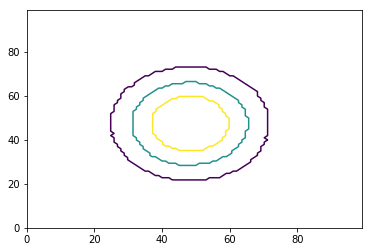

In [330]:
#creating contours from oldest file

cntr_set = plt.contour(np.array(data['levels']).reshape(100, 100), levels)
# print (cntr_set)

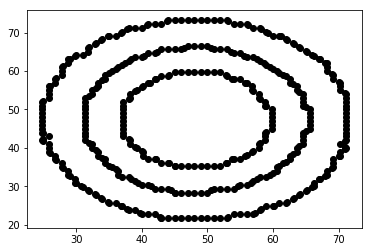

In [331]:
#generating the graph
cntr_data = pd.DataFrame(columns=['level', 'node_x', 'node_y', 'path'])
frames = list()

for level_index in range(len(cntr_set.collections)):
    path_counter = 0
    indices = np.arange(0, len(cntr_set.collections[level_index].get_paths()))
    array_list = np.take(cntr_set.collections[level_index].get_paths(), indices)
    for item in array_list.flat:
        node_x = item.vertices[:, 0].tolist()
        node_y = item.vertices[:, 1].tolist()
        frames.append([level_index, node_x, node_y, path_counter])
        path_counter += 1
df = pd.DataFrame(frames, columns=['level', 'node_x', 'node_y', 'path'])
df1 = df[['level', 'node_y', 'path']]
df2 = df[['level', 'node_x', 'path']]
lst_col = 'node_y'
r1 = pd.DataFrame({
    col: np.repeat(df1[col].values, df1[lst_col].str.len())
    for col in df1.columns.drop(lst_col)}
).assign(**{lst_col: np.concatenate(df1[lst_col].values)})[df1.columns]
lst_col2 = 'node_x'
r2 = pd.DataFrame({
    col: np.repeat(df2[col].values, df2[lst_col2].str.len())
    for col in df2.columns.drop(lst_col2)}
).assign(**{lst_col2: np.concatenate(df2[lst_col2].values)})[df2.columns]

cntr_data['level'] = r1['level'].tolist()
cntr_data['node_x'] = r2['node_x'].tolist()
cntr_data['node_y'] = r1['node_y'].tolist()
cntr_data['path'] = r1['path'].tolist()
# print (cntr_data)
plt.plot(cntr_data['node_x'], cntr_data['node_y'], 'o', color = 'black')

In [332]:

weights = np.full((len(cntr_data)), 1)  # initialize weights to one
cntr_data['weights'] = weights
# print (cntr_data)

# group the dataframe to count path_length(number of nodes in the path)
path_length_df = cntr_data.groupby(['level', 'path']).size().reset_index(name='path_length')
# print (path_length_df)

# find all paths in all levels that have only one node or path length 1
path_length_1_df = path_length_df[path_length_df['path_length'] == 1]
# print (path_length_1_df)

cntr_data_weight_0 = cntr_data[(np.isin(cntr_data['level'], path_length_1_df['level'])) &
                                   (np.isin(cntr_data['path'], path_length_1_df['path']))]
# print (cntr_data_weight_0)

# these path length 1 paths have weight 0
cntr_data_weight_0['weights'] = 0
# print (cntr_data_weight_0)

# finding all other paths
cntr_data__weight_1 = cntr_data[~(np.isin(cntr_data['level'], path_length_1_df['level'])) |
                                    ~(np.isin(cntr_data['path'], path_length_1_df['path']))]
# print (cntr_data__weight_1)

cntr_data_weight_1_diffrence = (cntr_data__weight_1.shift() - cntr_data__weight_1)
# print (cntr_data_weight_1_diffrence)

#calculating weight as Sqr_root(x^2 + y^2); x = x2-x1, y = y2-y1
cntr_data_weight_1_diffrence['calculated_weight'] = (np.sqrt(
    (cntr_data_weight_1_diffrence['node_x'].values) ** 2 + (
        cntr_data_weight_1_diffrence['node_y'].values) ** 2).tolist())
# print (cntr_data_weight_1_diffrence)

cntr_data__weight_1['calculated_weight'] = cntr_data_weight_1_diffrence['calculated_weight'].tolist()
cntr_data__weight_1['path_diff'] = cntr_data_weight_1_diffrence['path'].tolist()
# print (cntr_data__weight_1)

weight_list = cntr_data__weight_1['calculated_weight'].tolist()
# print (weight_list)

#reduces complexity
# for index,row in cntr_data__weight_1.iterrows():
#     if(row['path_diff'] != 0):
#         weight_list[index] = weight_list[index + 1]

indices = cntr_data__weight_1.loc[cntr_data__weight_1['path_diff'] != 0]
# print (indices)
for index, row in indices.iterrows():
    weight_list[index] = weight_list[index + 1]
# print (weight_list)

cntr_data__weight_1['act2'] = weight_list
cntr_data__weight_1['actual_weight'] = weight_list
cntr_data__weight_1 = cntr_data__weight_1[['level', 'node_x', 'node_y', 'path', 'actual_weight']]
# print (cntr_data__weight_1)

cntr_data_weight_0['actual_weight'] = cntr_data_weight_0['weights']
cntr_data_weight_0 = cntr_data_weight_0[['level', 'node_x', 'node_y', 'path', 'actual_weight']]
# print (cntr_data_weight_0)

weighted_df = pd.concat([cntr_data_weight_0, cntr_data__weight_1])
weighted_df = weighted_df.sort_values(['level', 'path'])
# print (weighted_df)

# weighted_df['aggregated_weight'] = weighted_df.groupby(['level', 'path','node_x', 'node_y'])['actual_weight'].transform('sum')
weighted_df['aggregated_weight'] = weighted_df.groupby(['level', 'path'])['actual_weight'].transform('sum')
# print (weighted_df)

weighted_df = weighted_df[['level', 'node_x', 'node_y', 'path', 'aggregated_weight', 'actual_weight']]
# print (weighted_df)
weighted_df['normalized'] = (weighted_df['aggregated_weight'] - weighted_df['aggregated_weight'].min()) / (
            weighted_df['aggregated_weight'].max() - weighted_df['aggregated_weight'].min()+.00000001)
# print (weighted_df)




# fethching the direction values
data['node_x_1'] = data['longitude']
data['node_y_1'] = data['latitude']
# print (data[(data['res_x_neg']!=0)])

weighted_df['node_x_1'] = weighted_df['node_x'] // 1
weighted_df['node_y_1'] = weighted_df['node_y'] // 1 

merged_df = weighted_df.merge(data, how='left')
# print (merged_df)
# print (weighted_df)

truecopy = weighted_df.copy()
shiftedcopy = weighted_df.copy()
truecopy['node_x_1'] = truecopy['node_x'] // 1
truecopy['node_y_1'] = truecopy['node_y'] // 1
shiftedcopy['node_x_1'] = (1 + shiftedcopy['node_x']) // 1
# print (shiftedcopy['node_x'])
# print (shiftedcopy['node_x_1'])
shiftedcopy['node_y_1'] = (1 + shiftedcopy['node_y']) // 1
weighted_df = pd.concat([truecopy,shiftedcopy])
# print (weighted_df)
weighted_df.drop_duplicates(subset=['node_x_1','node_y_1'])
# print (weighted_df)
merged_df = weighted_df.merge(data, how='left', on=['node_x_1', 'node_y_1'])

# merged_df = merged_df[['res_x_pos', 'res_x_neg', 'res_y_pos', 'res_y_neg', 'node_x_1', 'node_y_1']]
merged_df = merged_df[['res_x_HL', 'res_y_HL', 'res_x_LH', 'res_y_LH', 'node_x_1', 'node_y_1']]

# print ("--------------------")
 

weighted_df['res_dir_x_HL'] = merged_df['res_x_HL'].tolist()
weighted_df['res_dir_y_HL'] = merged_df['res_y_HL'].tolist()
weighted_df['res_dir_x_LH'] = merged_df['res_x_LH'].tolist()
weighted_df['res_dir_y_LH'] = merged_df['res_y_LH'].tolist()

weighted_df['res_dir_x_1_HL'] = weighted_df['res_dir_x_HL'] * weighted_df['actual_weight']
weighted_df['res_dir_y_1_HL'] = weighted_df['res_dir_y_HL'] * weighted_df['actual_weight']
weighted_df['res_dir_x_1_LH'] = weighted_df['res_dir_x_LH'] * weighted_df['actual_weight']
weighted_df['res_dir_y_1_LH'] = weighted_df['res_dir_y_LH'] * weighted_df['actual_weight']
#print (weighted_df.groupby(['level', 'path'])['res_dir_x_1_pos'])
 

# weighted_df['res_dir_x_1_pos'] = weighted_df.groupby(['level', 'path','node_x_1', 'node_y_1'])['res_dir_x_1_pos'].transform('sum') / (.0001+weighted_df['aggregated_weight'])
# weighted_df['res_dir_x_1_neg'] = weighted_df.groupby(['level', 'path','node_x_1', 'node_y_1'])['res_dir_x_1_neg'].transform('sum') / (.0001+weighted_df['aggregated_weight'])
# weighted_df['res_dir_y_1_pos'] = weighted_df.groupby(['level', 'path','node_x_1', 'node_y_1'])['res_dir_y_1_pos'].transform('sum') / (.0001+weighted_df['aggregated_weight'])
# weighted_df['res_dir_y_1_neg'] = weighted_df.groupby(['level', 'path','node_x_1', 'node_y_1'])['res_dir_y_1_neg'].transform('sum') / (.0001+weighted_df['aggregated_weight'])
# print (weighted_df)

# weighted_df['resultant_pos'] = weighted_df['res_dir_x_1_pos'] + weighted_df['res_dir_y_1_pos']
# weighted_df['resultant_neg'] = weighted_df['res_dir_x_1_neg'] + weighted_df['res_dir_y_1_neg']
weighted_df['resultant'] = 0
# print (weighted_df)
#print (weighted_df['res_dir_x_1_neg'])
#print (weighted_df['res_dir_x_1_pos'])
weighted_df['mag_HL'] = np.sqrt(np.square(weighted_df['res_dir_x_1_HL']) + np.square(weighted_df['res_dir_y_1_HL']))
weighted_df['mag_LH'] = np.sqrt(np.square(weighted_df['res_dir_x_1_LH']) + np.square(weighted_df['res_dir_y_1_LH']))
#print (weighted_df)
# print (weighted_df['mag_pos'])
# print (weighted_df['mag_neg'])

In [333]:
##Point and Node for Quadtree
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y


class Node():
    def __init__(self, x0, y0, w, h, points):
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.points = points
        self.children = []

    def get_width(self):
        return self.width

    def get_height(self):
        return self.height

    def get_points(self):
        return self.points

In [334]:
#Quadtree Implementation
class QTree:
    def __init__(self, k, n):
        self.threshold = k
        self.points = [Point(x[0], x[1]) for x in n]
        self.root = Node(0, 0, 699, 639, self.points)

    def add_point(self, x, y):
        self.points.append(Point(x, y))

    def get_points(self):
        return self.points

    def subdivide(self):
        self.recursive_subdivide(self.root, self.threshold)

    def graph(self):
        c = self.find_children(self.root)
        areas = set()
        for el in c:
            areas.add(el.width * el.height)
        x_grid = list()
        y_grid = list()
        for n in c:
            x_grid.append(n.x0)
            y_grid.append(n.y0)
        x = [point.x for point in self.points]
        y = [point.y for point in self.points]
        return x_grid, y_grid

    def recursive_subdivide(self, node, k):
        if len(node.points) <= k:
            return

        w_ = float(node.width / 2)
        h_ = float(node.height / 2)

        p = self.contains(node.x0, node.y0, w_, h_, node.points)
        x1 = Node(node.x0, node.y0, w_, h_, p)
        self.recursive_subdivide(x1, k)

        p = self.contains(node.x0, node.y0 + h_, w_, h_, node.points)
        x2 = Node(node.x0, node.y0 + h_, w_, h_, p)
        self.recursive_subdivide(x2, k)

        p = self.contains(node.x0 + w_, node.y0, w_, h_, node.points)
        x3 = Node(node.x0 + w_, node.y0, w_, h_, p)
        self.recursive_subdivide(x3, k)

        p = self.contains(node.x0 + w_, node.y0 + w_, w_, h_, node.points)
        x4 = Node(node.x0 + w_, node.y0 + h_, w_, h_, p)
        self.recursive_subdivide(x4, k)

        node.children = [x1, x2, x3, x4]

    def contains(self, x, y, w, h, points):
        pts = []
        for point in points:
            if point.x >= x and point.x <= x + w and point.y >= y and point.y <= y + h:
                pts.append(point)
        return pts

    def find_children(self,node):
        if not node.children:
            return [node]
        else:
            children = []
            for child in node.children:
                children += (self.find_children(child))
        return children

In [335]:
###Filtering Process based on QuadTree
# points = list(zip(weighted_df['node_x'].tolist(), weighted_df['node_y'].tolist()))
# # print (points)
# qtree = QTree(5, points)
# qtree.subdivide()
# h = qtree.graph()
# x_grid = np.unique(np.array(h[0])//1).tolist()
# y_grid = np.unique(np.array(h[1])//1).tolist()
# v1 = np.isin(weighted_df['node_x'], x_grid)
# v2 = np.isin(weighted_df['node_y'], y_grid)
# v3 = v1 | v2
# # print (v3)
# # v3 = v1 & v2
# weighted_df = weighted_df[v3]
# # print(v3)
# # weighted_df = weighted_df[(np.isin(weighted_df['node_x'], x_grid)) | (np.isin(weighted_df['node_y'], y_grid))]
# plt.plot(weighted_df['node_x'], weighted_df['node_y'],  'o', color='black')
# # print (weighted_df)
# # print (weighted_df[weighted_df['res_dir_x_1_pos']>0])

In [340]:
## Generating data for Final Image
weighted_df = weighted_df[
            ['level', 'node_x', 'node_y', 'path', 'aggregated_weight', 'actual_weight', 'normalized',
             'res_dir_x_HL', 'res_dir_y_HL', 'res_dir_x_LH', 'res_dir_y_LH',
             'res_dir_x_1_HL', 'res_dir_y_1_HL', 'res_dir_x_1_LH', 'res_dir_y_1_LH',
             'resultant', 'mag_HL', 'mag_LH']]

p10 = np.percentile(weighted_df['normalized'], 10)
p90 = np.percentile(weighted_df['normalized'], 90)
weighted_df = weighted_df[(weighted_df['normalized'] >= p10) & (weighted_df['normalized'] <= p90)]
df1 = weighted_df[(weighted_df['mag_HL'] >= 0) & (weighted_df['mag_HL'] < 0.6)].copy()
df2 = weighted_df[(weighted_df['mag_LH'] >= 0) & (weighted_df['mag_LH'] < 0.6)].copy()
# df1 = weighted_df[(weighted_df['mag_HL'] >= 0)].copy()
# df2 = weighted_df[(weighted_df['mag_LH'] >= 0)].copy()
# print (weighted_df['res_dir_x_1_pos'])

# print (df1_neg)

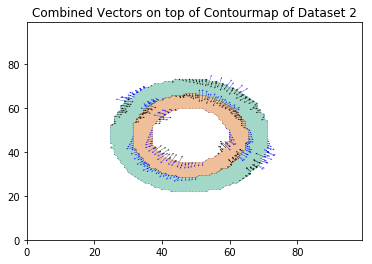

In [341]:
cmap = ['#1b9e77','#d95f02','#7570b3','#e7298a']
# plt.contourf(np.array(data['levels']).reshape(699, 639), quantile_values, colors = cmap)
fig, ax = plt.subplots()
# plt.contour(np.array(data['D']).reshape(100, 100), [0, .4, .6, .8], colors = cmap)
CS = ax.contourf(np.array(data['levels']).reshape(100, 100), levels, colors = cmap, alpha = 0.4)
# print (df1_pos['res_dir_x_1_pos'])
plt.quiver(df1['node_x'], df1['node_y'], df1['res_dir_x_1_HL'], df1['res_dir_y_1_HL'],
                                     width=0.0009, headwidth=5.5, headlength=5.5, color='blue',
                                     scale_units='inches', scale=1.5)
plt.quiver(df2['node_x'], df2['node_y'], df2['res_dir_x_1_LH'], df2['res_dir_y_1_LH'],
                                     width=0.0009, headwidth=5.5, headlength=5.5, color='black',
                                     scale_units='inches', scale=1.5)
# ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Combined Vectors on top of Contourmap of Dataset 2')
plt.savefig('Combined_Synthetic_Vectors_over_Data_2.png')